# Detection of Lung Infection
Project 1 

#### DESCRIPTION

Artificial Intelligence has evolved a lot and is currently able to solve problems that are very complex and require human specialization. One such area is healthcare.

 

A lot of research happens every day to use deep learning for the betterment of humanity, and one such is healthcare.

 

#### Objective:   

To build a model using a convolutional neural network that can classify lung infection in a person using medical imagery

#### Dataset Description:

The dataset contains three different classes, including healthy, type 1 disease, and type 2 disease.

 

#### Train folder: 
This folder has images for training the model, which is divided into subfolders having the same name as the class. 

#### Test folder: 
This folder has images for testing the model, which is divided into subfolders having the same name as the class.

Following operations should be performed using Keras or PyTorch or Torch vision-   

1. Import the necessary libraries

2. Plot the sample images for all the classes 

3. Plot the distribution of images across the classes

4. Build a data augmentation for train data to create new data with translation, rescale and flip, and rotation transformations. Rescale the image at 48x48

5. Build a data augmentation for test data to create new data and rescale the image at 48x48

6. Read images directly from the train folder and test folder using the appropriate function


## Build 3 CNN model with:

### 1. CNN Architecture:

 

  1. Add convolutional layers with different filters, max pool layers, dropout layers, and batch normalization layers  

  2. Use Relu as an activation function

  3. Take the loss function as categorical cross-entropy

  4. Take rmsprop as an optimizer

  5. Use early stopping with the patience of two epochs and monitor the validation loss or accuracy

  6. Try with ten numbers epoch

  7. Train the model using a generator and test the accuracy of the test data at every epoch

  8. Plot the training and validation accuracy, and the loss

  9. Observe the precision, recall the F1-score for all classes for both grayscale and color models, and determine if the model’s classes are good


### 2. Transfer learning using mobile net:

  1. Prepare data for the pre-trained mobile net model, with color mode as RGB

  2. Create an instance of a mobile net pre-trained model 

  3. Add dense layer, dropout layer, batch normalization layer on the pre-trained model

  4. Create a final output layer with a SoftMax activation function

  5. Change the batch size activation function and optimize as rmsprop and observe if the accuracy increases

  6. Take the loss function as categorical cross-entropy

  7. Use early stopping with the patience of two epoch and call back function for preventing overfitting

  8. Try with ten numbers epoch

  9. Train the model using a generator and test the accuracy of the test data at every epoch

  10. Plot the training and validation accuracy, and the loss

  11. Observe the precision, recall the F1-score for all classes for both grayscale

  12. and color models, and determine if the model’s classes are good


### 3. Transfer Learning using Densenet121:

  1. Prepare the dataset for the transfer learning algorithm using Densenet121 with the image size as 224x224x3

  2. Freeze the top layers of the pre-trained model

  3. Add a dense layer at the end of the pre-trained model followed by a dropout layer and try various combinations to get an accuracy

  4. Add the final output layer with a SoftMax activation function

  5. Take loss function as categorical cross-entropy

  6. Take Adam as an optimizer

  7. Use early stopping to prevent overfitting

  8. Try with 15 number of epoch and batch size with seven, also try various values to see the impact on results

  9. Train the model using the generator and test the accuracy of the test data at every epoch 

  10. Plot the training and validation accuracy, and the loss

  11. Observe the precision, recall the F1-score for all classes for both grayscale

  12. and color models, and determine if the model’s classes are good

 

### Final step:   

  Compare all the models on the basis of accuracy, precision, recall, and f1-s

#### 1. Import the necessary libraries

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
import random

import cv2
import pickle
from keras import backend as k
import tensorflow as tf
from tensorflow.keras import models, layers
import seaborn as sns

# 1. CNN Architecture:

### 1.1 List the categories of the data and plot the distribution of images across the classes

In [2]:
# img_categories = []

In [3]:

# dir_path = 'Dataset_Detection_of_Lung_Infection/data/train/Healthy/'
# file_names_healthy = os.listdir(dir_path)
# category = os.path.basename(os.path.dirname(dir_path))
# for file in file_names_healthy:
#     img_categories.append(category)      


In [4]:
# dir_path = 'Dataset_Detection_of_Lung_Infection/data/train/Type_1_disease/'
# file_names_type1 = os.listdir(dir_path)
# category = os.path.basename(os.path.dirname(dir_path))
# for file in file_names_type1:
#     img_categories.append(category)  

In [5]:
# dir_path = 'Dataset_Detection_of_Lung_Infection/data/train/Type_2_disease/'
# file_names_type2 = os.listdir(dir_path)
# category = os.path.basename(os.path.dirname(dir_path))
# for file in file_names_type2:
#     img_categories.append(category)  

In [6]:
img_categories = []
def get_categories(dir_path):
    filenames = os.listdir(dir_path)
    category = os.path.basename(os.path.dirname(dir_path))
    for file in filenames:
        img_categories.append(category)
    
    return filenames

In [7]:
img_categories = []
file_names_healthy = get_categories('Dataset_Detection_of_Lung_Infection/data/train/Healthy/')
file_names_type1   = get_categories('Dataset_Detection_of_Lung_Infection/data/train/Type_1_disease/')
file_names_type2   = get_categories('Dataset_Detection_of_Lung_Infection/data/train/Type_2_disease/')

In [8]:
len(img_categories)

251

In [9]:
all_file_names = file_names_healthy + file_names_type1 + file_names_type2

In [10]:
len(all_file_names)

251

In [11]:
df = pd.DataFrame({'Image': all_file_names, 'Infection_Type': img_categories})
df

,Image,Infection_Type
0,01.jpeg,Healthy
1,010.jpeg,Healthy
2,011.jpeg,Healthy
3,012.jpeg,Healthy
4,013.jpeg,Healthy
...,...,...
246,084.jpeg,Type_2_disease
247,09.jpeg,Type_2_disease
248,094.jpeg,Type_2_disease
249,095.jpeg,Type_2_disease


<AxesSubplot:xlabel='Infection_Type', ylabel='count'>

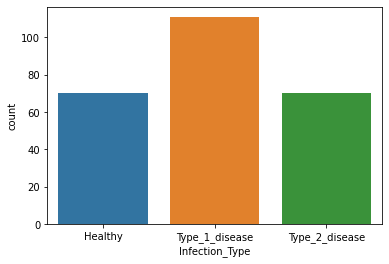

In [12]:
sns.countplot(x='Infection_Type',data=df)

### 1.3 Plotting the sample images for all the classes

In [13]:
def show_sample_images(dir_path):    
    filenames = os.listdir(dir_path)
    sample = random.choice(filenames)
    print('Infection Type: ', os.path.basename(os.path.dirname(dir_path)))
    print('Image name:     ', sample)
    img_array = cv2.imread(dir_path + sample, cv2.IMREAD_GRAYSCALE)
    print('Image shape:    ',img_array.shape)
    image = load_img(dir_path + sample)
    plt.imshow(image)
    return

Infection Type:  Healthy
Image name:      092.jpeg
Image shape:     (224, 224)


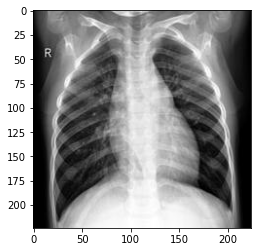

In [14]:
show_sample_images('Dataset_Detection_of_Lung_Infection/data/train/Healthy/')

Infection Type:  Type_1_disease
Image name:      022.jpeg
Image shape:     (224, 224)


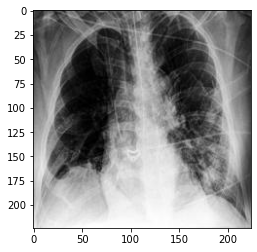

In [15]:
show_sample_images('Dataset_Detection_of_Lung_Infection/data/train/Type_1_disease/')

Infection Type:  Type_2_disease
Image name:      025.jpeg
Image shape:     (224, 224)


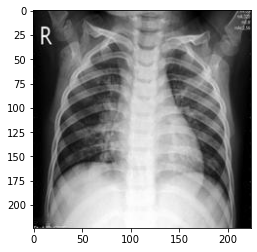

In [16]:
show_sample_images('Dataset_Detection_of_Lung_Infection/data/train/Type_2_disease/')

### 1.3 Building Data Augmentation for Training
First I am using color mode as rgb to test the model on 3 channel images. Then I will change it to gray scale. 

In [17]:
train_cnn_gen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,     # Randomly Zoom by 20% some training images
                             rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
                             horizontal_flip = True) # Randomly flip images horizontally.

In [18]:
test_cnn_gen = ImageDataGenerator(rescale= 1./255)

In [19]:
# Once our model is ready, we directly read the data from train folder and augment the data.
train_cnn_data_generator = train_cnn_gen.flow_from_directory('Dataset_Detection_of_Lung_Infection/data/train/',
                                           target_size = (48, 48),
                                           batch_size = 32,     
                                           color_mode = 'rgb',
                                           #color_mode = 'grayscale',                  
                                           class_mode = 'categorical',
                                           shuffle=True                                           
                                          )


Found 251 images belonging to 3 classes.


In [20]:
# Once our model is ready, we directly read the data from test folder and augment the data.
test_cnn_data_generator = test_cnn_gen.flow_from_directory('Dataset_Detection_of_Lung_Infection/data/test/',                                                 
                                                 target_size=(48,48),
                                                 batch_size= 32,
                                                 color_mode = 'rgb',
                                                 #color_mode = 'grayscale',
                                                 class_mode= 'categorical'                                               
                                                )

Found 66 images belonging to 3 classes.


In [23]:
nb_train_samples = len(train_cnn_data_generator.filenames) 
num_classes = len(train_cnn_data_generator.class_indices) 

# get the class labels for the training data, in the original order 
train_labels = train_cnn_data_generator.classes 

print(nb_train_samples)
print(num_classes)
print(train_labels)

251
3
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [24]:
train_cnn_data_generator[0][0].shape

(32, 48, 48, 3)

In [25]:
train_cnn_data_generator[0][0][0].shape

(48, 48, 3)

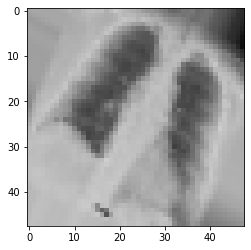

In [26]:
plt.imshow(train_cnn_data_generator[0][0][0])
plt.show()

In [27]:
nb_test_samples = len(test_cnn_data_generator.filenames) 
num_test_classes = len(test_cnn_data_generator.class_indices) 


#get class labels for the training data, in the original order 
test_labels = test_cnn_data_generator.classes 
print(nb_test_samples)
print(num_test_classes)
print(test_labels)

66
3
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [28]:
cnn_model = Sequential()
cnn_model.add(Conv2D(16 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (48,48,3)))
#cnn_model.add(Conv2D(16 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (48,48,1)))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
cnn_model.add(Conv2D(34 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
cnn_model.add(Dropout(0.1))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
cnn_model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
cnn_model.add(Dropout(0.1))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
cnn_model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
cnn_model.add(Dropout(0.1))
cnn_model.add(BatchNormalization())
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 128 , activation = 'relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(units = 256 , activation = 'relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(units = 3 , activation = 'softmax'))

cnn_model.compile(optimizer = "rmsprop" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 34)        4930      
                                                                 
 dropout (Dropout)           (None, 24, 24, 34)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 34)       1

### 1.4 Use early stopping with the patience of two epochs and monitor the validation loss or accuracy

In [29]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=2,restore_best_weights=True) 

In [30]:
print(train_cnn_data_generator.n)
print(train_cnn_data_generator.batch_size)

251
32


In [31]:
step_size_train=train_cnn_data_generator.n//train_cnn_data_generator.batch_size
step_size_val=test_cnn_data_generator.n//test_cnn_data_generator.batch_size
print(step_size_train)
print(step_size_val)

7
2


### 1.5 Training the CNN model

In [33]:
# Training the model
epochs = 10
history = cnn_model.fit(    
    train_cnn_data_generator, 
    epochs=epochs,
    validation_data=test_cnn_data_generator,
    validation_steps = step_size_val,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/10
8/8 [==============================] - 6s 535ms/step - loss: 0.9304 - accuracy: 0.6215 - val_loss: 1.0775 - val_accuracy: 0.3594
Epoch 2/10
8/8 [==============================] - 2s 302ms/step - loss: 0.4403 - accuracy: 0.8207 - val_loss: 1.0116 - val_accuracy: 0.5000
Epoch 3/10
8/8 [==============================] - 3s 353ms/step - loss: 0.5083 - accuracy: 0.8287 - val_loss: 1.0572 - val_accuracy: 0.4062
Epoch 4/10
8/8 [==============================] - 2s 338ms/step - loss: 0.4134 - accuracy: 0.8725 - val_loss: 1.1578 - val_accuracy: 0.4062


In [36]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):    
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

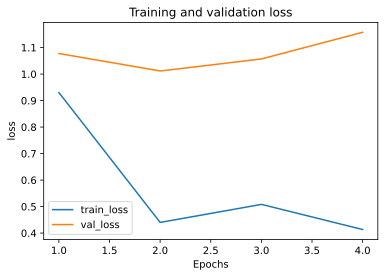

In [35]:
plot_metric(history, 'loss')

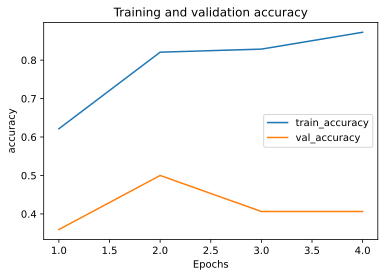

In [37]:
plot_metric(history, 'accuracy')

In [38]:
 # returns accuracy of training
print("Training Accuracy: ", history.history['accuracy'][-1])
print("Testing Accuracy : ", history.history['val_accuracy'][-1])

Training Accuracy:  0.8725099563598633
Testing Accuracy :  0.40625


In [39]:
score = cnn_model.evaluate(test_cnn_data_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


3/3 [==============================] - 2s 447ms/step - loss: 1.0130 - accuracy: 0.5000
Test loss: 1.0130435228347778
Test accuracy: 0.5


In [40]:
# returns accuracy of training
print("Training Accuracy: ", history.history['accuracy'][-1])
print("Testing Accuracy : ", history.history['val_accuracy'][-1])

Training Accuracy:  0.8725099563598633
Testing Accuracy :  0.40625


In [41]:
predictions = cnn_model.predict(test_cnn_data_generator)
predictions = predictions.reshape(1,-1)[0]
predictions[:10]
y_classes = predictions.argmax(axis=-1)
y_classes

3/3 [==============================] - 2s 448ms/step


40

#### Testing the model

In [42]:
Y_pred = cnn_model.predict(test_cnn_data_generator, test_cnn_data_generator.n//test_cnn_data_generator.batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
y_pred

3/3 [==============================] - 2s 436ms/step


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
      dtype=int64)

[0. 0. 1.]


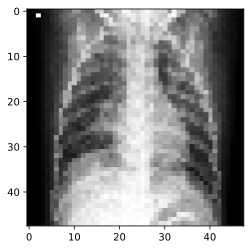

In [43]:
print(test_cnn_data_generator[0][1][0])
plt.imshow(test_cnn_data_generator[0][0][0])
plt.show()

In [44]:
test_image = test_cnn_data_generator[0][0][0].reshape(-1,48,48,3)
test_image.shape

(1, 48, 48, 3)

In [45]:
predictions = cnn_model.predict(test_image)
predictions = predictions.reshape(1,-1)[0]
predictions[:10]
y_classes = predictions.argmax(axis=-1)
y_classes

1/1 [==============================] - 0s 209ms/step


2

In [46]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
      dtype=int64)

Healthy
022.jpeg


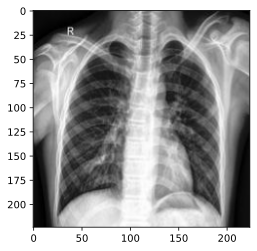

In [47]:
healthy_path = 'Dataset_Detection_of_Lung_Infection/data/train/Healthy/'
filenames = os.listdir(healthy_path)
sample = random.choice(filenames)
print(os.path.basename(os.path.dirname(healthy_path)))
print(sample)
image = load_img(healthy_path + sample)
plt.imshow(image)

img_array = cv2.imread(healthy_path + sample)

In [48]:
img_array.shape

(224, 224, 3)

In [49]:
test_img = img_resize_array = cv2.resize(img_array, (48,48))
test_img.shape

(48, 48, 3)

In [50]:
test_img = np.reshape(test_img,(-1,48,48,3))
test_img.shape

(1, 48, 48, 3)

In [51]:
predictions = cnn_model.predict(test_img)
predictions = predictions.reshape(1,-1)[0]
# predictions[:10]
y_classes = predictions.argmax(axis=-1)
y_classes

1/1 [==============================] - 0s 212ms/step


0

#### In this case the Predicted result and Actual Result matches. 
The image is of Healthy type (0) and model predicted correctly to 0.

In [52]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(test_cnn_data_generator.classes, y_pred)
target_names = ['Healthy', 'Type1', 'Type2'] #classes names
clf_rpt = classification_report(test_cnn_data_generator.classes, y_pred, target_names=target_names)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
target_names = ['Healthy', 'Type1', 'Type2'] #classes names
clf_rpt = classification_report(test_cnn_data_generator.classes, y_pred, target_names=target_names)
print(clf_rpt)

              precision    recall  f1-score   support

     Healthy       0.00      0.00      0.00        20
       Type1       0.30      0.58      0.39        26
       Type2       0.12      0.10      0.11        20

    accuracy                           0.26        66
   macro avg       0.14      0.23      0.17        66
weighted avg       0.16      0.26      0.19        66



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


End of CNN Architecture
Conclusion: 
1. CNN model using RGB images.

Classification Report:
               precision    recall  f1-score   support

     Healthy       0.00      0.00      0.00        20
       Type1       0.30      0.58      0.39        26
       Type2       0.12      0.10      0.11        20

    accuracy                           0.26        66
    macro avg      0.14      0.23      0.17        66
    weighted avg   0.16      0.26      0.19        66



The overall training and testing accuracy:

Training Accuracy:  0.8725099563598633\
Testing Accuracy :  0.40625

The Testing accuracy does not seems to be good in case of rgb image prediction usin CNN.

# 2. Transfer learning using mobile net

In [54]:
import tensorflow_hub as hub  # tensorflow_hub is a place that contains all the pre-trained models
from keras.applications.mobilenet_v2 import MobileNetV2

#### 1. Prepare data for the pre-trained mobile net model, with color mode as RGB

All images are having 3 channels that are required for feeding into mobilenetv2. \
Now we need to reshape all the images to 224 x224 size to obtain shape (224 x 224 x 3)

In [55]:
from skimage.color import gray2rgb
from skimage.io import imread, imsave
from skimage.filters import threshold_otsu
from skimage import img_as_uint

inp_image = imread("Dataset_Detection_of_Lung_Infection/data/train/Healthy/092.jpeg")
inp_image.shape

(224, 224, 3)

In [56]:
# Testing rehsape
from PIL import Image
image = Image.open('Dataset_Detection_of_Lung_Infection/data/trainrgb/Healthy/Graynew.jpg')
print(f"Original size : {image.size}") 
print(f"Original shape : {np.array(image).shape}") 

sunset_resized = image.resize((224, 224))
sunset_resized.save('Dataset_Detection_of_Lung_Infection/data/trainrgb/Healthy/Graynew2.jpeg')
print(f"Original size : {sunset_resized.size}") 
print(f"Original shape : {np.array(sunset_resized).shape}") 

Original size : (2043, 2087)
Original shape : (2087, 2043, 3)
Original size : (224, 224)
Original shape : (224, 224, 3)


#### Resizing all the images in training folder to 224 x 224 x 3 shape

In [57]:
# Reshape all the image to 224 x 224
from PIL import Image
def reshape_images(dir_path):
    filenames = os.listdir(dir_path)
    category = os.path.basename(os.path.dirname(dir_path))
    for file in filenames:
        image = Image.open(dir_path + file)
        resize_img = image.resize((224, 224))
        resize_img.save(dir_path + file)
    return filenames

In [58]:
dir_path = 'Dataset_Detection_of_Lung_Infection/data/train/Healthy/'
train_healthy = reshape_images(dir_path)

In [59]:
dir_path = 'Dataset_Detection_of_Lung_Infection/data/train/Type_1_disease/'
train_type1 = reshape_images(dir_path)

In [60]:
dir_path = 'Dataset_Detection_of_Lung_Infection/data/train/Type_2_disease/'
train_type2 = reshape_images(dir_path)

In [61]:
inp_image = imread("Dataset_Detection_of_Lung_Infection/data/train/Healthy/092.jpeg")
inp_image.shape

(224, 224, 3)

In [62]:
train_healthy[0:10]

['01.jpeg',
 '010.jpeg',
 '011.jpeg',
 '012.jpeg',
 '013.jpeg',
 '014.jpeg',
 '015.jpeg',
 '016.jpeg',
 '017.jpeg',
 '018.jpeg']

#### 2. Create an instance of a mobile net pre-trained model 

In [63]:
# base_model = MobileNetV2(weights='imagenet')
base_model=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3)) #imports the mobilenet model and discards the last 1000 neuron layer.

In [64]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

Freezing the Base model layers as we want to used pretarained base model and only train the new layers on custom labesl 


In [65]:
base_model.trainable = False

#### 3. Add dense layer, dropout layer, batch normalization layer on the pre-trained model
#### 4. Create a final output layer with a SoftMax activation function
#### 5. Change the batch size activation function and optimize as rmsprop and observe if the accuracy increases
#### 6. Take the loss function as categorical cross-entropy

In [66]:
penultimate_layer = base_model.layers[-1]
penultimate_layer

In [67]:
model = tf.keras.Sequential()
model.add(base_model)

# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(64 * 64 * 3)) # just an example --> choose what you want
# model.add(tf.keras.layers.Reshape((64, 64, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), strides= 2, activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128, kernel_size= (3,3), strides = 2, padding = 'same', activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(units = 128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=3, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 64)          737344    
                                                                 
 dropout_5 (Dropout)         (None, 3, 3, 64)          0         
                                                                 
 batch_normalization_4 (Batc  (None, 3, 3, 64)         256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 64)         0         
 2D)                                                             
                                                      

Training only the newly added layers

In [68]:
for layer in model.layers[-12:]:
    print(layer.name, layer.output_shape)
    layer.trainable = True

conv2d_4 (None, 3, 3, 64)
dropout_5 (None, 3, 3, 64)
batch_normalization_4 (None, 3, 3, 64)
max_pooling2d_3 (None, 2, 2, 64)
conv2d_5 (None, 1, 1, 128)
dropout_6 (None, 1, 1, 128)
batch_normalization_5 (None, 1, 1, 128)
max_pooling2d_4 (None, 1, 1, 128)
flatten_1 (None, 128)
dense_3 (None, 128)
dropout_7 (None, 128)
dense_4 (None, 3)


In [69]:
model.compile(optimizer = "rmsprop" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 64)          737344    
                                                                 
 dropout_5 (Dropout)         (None, 3, 3, 64)          0         
                                                                 
 batch_normalization_4 (Batc  (None, 3, 3, 64)         256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 64)         0         
 2D)                                                             
                                                      

### Getting data from folder using Imagedata generator

In [75]:
train_mobilenetv2_gen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,     # Randomly Zoom by 20% some training images
                             rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
                             horizontal_flip = True) # Randomly flip images horizontally.

In [76]:
test_mobilenetv2_gen = ImageDataGenerator(rescale=1. / 255)

In [77]:
train_mobilenetv2_data_generator = train_mobilenetv2_gen.flow_from_directory('Dataset_Detection_of_Lung_Infection/data/train/',
                                           target_size = (224, 224),
                                           batch_size = 32,     
                                           color_mode = 'rgb',
                                           class_mode = 'categorical',
                                           shuffle=True                                           
                                          )

test_mobilenetv2_data_generator = test_mobilenetv2_gen.flow_from_directory('Dataset_Detection_of_Lung_Infection/data/test/',
                                           target_size = (224, 224),
                                           batch_size = 32,     
                                           color_mode = 'rgb',
                                           class_mode = 'categorical',
                                           shuffle=True                                           
                                          )

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [79]:
train_mobilenetv2_data_generator[0][0].shape

(32, 224, 224, 3)

In [80]:
train_mobilenetv2_data_generator[0][0]

array([[[[0.720844  , 0.720844  , 0.720844  ],
         [0.71773607, 0.71773607, 0.71773607],
         [0.71311873, 0.71311873, 0.71311873],
         ...,
         [0.1764706 , 0.1764706 , 0.1764706 ],
         [0.1764706 , 0.1764706 , 0.1764706 ],
         [0.1764706 , 0.1764706 , 0.1764706 ]],

        [[0.72335654, 0.72335654, 0.72335654],
         [0.72380483, 0.72380483, 0.72380483],
         [0.7206969 , 0.7206969 , 0.7206969 ],
         ...,
         [0.1764706 , 0.1764706 , 0.1764706 ],
         [0.1764706 , 0.1764706 , 0.1764706 ],
         [0.1764706 , 0.1764706 , 0.1764706 ]],

        [[0.71425337, 0.71425337, 0.71425337],
         [0.7189152 , 0.7189152 , 0.7189152 ],
         [0.723577  , 0.723577  , 0.723577  ],
         ...,
         [0.1764706 , 0.1764706 , 0.1764706 ],
         [0.1764706 , 0.1764706 , 0.1764706 ],
         [0.17756744, 0.17756744, 0.17756744]],

        ...,

        [[0.8980393 , 0.8980393 , 0.8980393 ],
         [0.8980393 , 0.8980393 , 0.8980393 ]

In [82]:
train_mobilenetv2_data_generator[0][0][0].shape

(224, 224, 3)

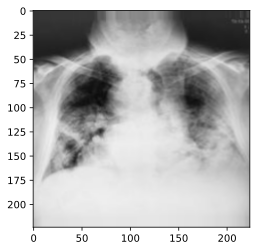

In [84]:
plt.imshow(train_mobilenetv2_data_generator[0][0][0])
plt.show()

In [85]:
train_mobilenetv2_data_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

In [87]:
step_size_train=train_mobilenetv2_data_generator.n//train_mobilenetv2_data_generator.batch_size
step_size_val=test_mobilenetv2_data_generator.n//test_mobilenetv2_data_generator.batch_size
print(step_size_train)
print(step_size_val)

7
2


In [88]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=2,restore_best_weights=True, verbose = 1) 

In [89]:
history_mobilenetv2 = model.fit(train_mobilenetv2_data_generator,
                                          steps_per_epoch=step_size_train,
                                          epochs=10, 
                                          validation_data=test_mobilenetv2_data_generator,
                                          validation_steps=step_size_val,
                                          callbacks = [early_stopping]
                                         )

Epoch 1/10
7/7 [==============================] - 23s 2s/step - loss: 0.6642 - accuracy: 0.7078 - val_loss: 0.9270 - val_accuracy: 0.5625
Epoch 2/10
7/7 [==============================] - 12s 2s/step - loss: 0.2703 - accuracy: 0.9041 - val_loss: 0.6498 - val_accuracy: 0.6719
Epoch 3/10
7/7 [==============================] - 12s 2s/step - loss: 0.2732 - accuracy: 0.8950 - val_loss: 0.2599 - val_accuracy: 0.9219
Epoch 4/10
7/7 [==============================] - 12s 2s/step - loss: 0.1668 - accuracy: 0.9498 - val_loss: 0.2384 - val_accuracy: 0.9375
Epoch 5/10
7/7 [==============================] - 12s 2s/step - loss: 0.2869 - accuracy: 0.9041 - val_loss: 0.7528 - val_accuracy: 0.7188
Epoch 6/10
7/7 [==============================] - 12s 2s/step - loss: 0.1842 - accuracy: 0.9315 - val_loss: 0.6286 - val_accuracy: 0.7500
Epoch 6: early stopping


In [90]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):    
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

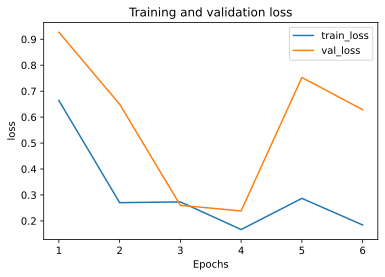

In [91]:
plot_metric(history_mobilenetv2, 'loss')

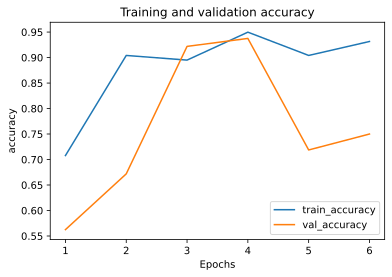

In [92]:
plot_metric(history_mobilenetv2, 'accuracy')

In [93]:
 # returns accuracy of training
print("Training Accuracy: ", history_mobilenetv2.history['accuracy'][-1])
print("Testing Accuracy : ", history_mobilenetv2.history['val_accuracy'][-1])

Training Accuracy:  0.931506872177124
Testing Accuracy :  0.75


In [96]:
Y_pred = model.predict(test_mobilenetv2_data_generator, test_mobilenetv2_data_generator.n//test_mobilenetv2_data_generator.batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
y_pred

3/3 [==============================] - 6s 862ms/step


array([0, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 0, 1, 2, 0, 1, 0, 0, 1, 0, 1,
       2, 1, 2, 1, 1, 1, 0, 1, 2, 0, 1, 2, 2, 1, 0, 1, 2, 0, 0, 1, 1, 2,
       2, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 0, 1, 1, 1],
      dtype=int64)

In [98]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(test_mobilenetv2_data_generator.classes, y_pred)
target_names = ['Healthy', 'Type1', 'Type2'] #classes names
clf_rpt = classification_report(test_mobilenetv2_data_generator.classes, y_pred, target_names=target_names)

In [99]:
conf_matrix

array([[ 5, 10,  5],
       [ 7, 11,  8],
       [ 6,  6,  8]], dtype=int64)

In [100]:
print(clf_rpt)

              precision    recall  f1-score   support

     Healthy       0.28      0.25      0.26        20
       Type1       0.41      0.42      0.42        26
       Type2       0.38      0.40      0.39        20

    accuracy                           0.36        66
   macro avg       0.36      0.36      0.36        66
weighted avg       0.36      0.36      0.36        66



              precision    recall  f1-score   support

     Healthy       0.28      0.25      0.26        20
       Type1       0.41      0.42      0.42        26
       Type2       0.38      0.40      0.39        20

    accuracy                           0.36        66
    macro avg      0.36      0.36      0.36        66
    weighted avg   0.36      0.36      0.36        66


The overall training and testing accuracy of mobilenetv2:

Training Accuracy:  0.931506872177124\
Testing Accuracy :  0.75

The Testing accuracy does seems to be good in case of rgb image prediction using mobilenetv2 when compared to CNN network.

# 3. Classification using Densnet121

#### 1. Create an instance of a mobile net pre-trained model 

In [102]:
import tensorflow_hub as hub  # tensorflow_hub is a place that contains all the pre-trained models
from keras.applications.densenet import DenseNet121

In [103]:
# base_model = MobileNetV2(weights='imagenet')
densenet_base_model=DenseNet121(include_top=False, weights='imagenet',input_shape=(224,224,3)) #imports the DenseNet121 model and discards the last neuron layer.

In [104]:
densenet_base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_2[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

 n)                                                                                               
                                                                                                  
 conv2_block4_1_conv (Conv2D)   (None, 56, 56, 128)  20480       ['conv2_block4_0_relu[0][0]']    
                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 56, 56, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 56, 56, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_blo

 conv3_block2_0_relu (Activatio  (None, 28, 28, 160)  0          ['conv3_block2_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_1_conv (Conv2D)   (None, 28, 28, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv3_block6_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 28, 28, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 28, 28, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_block7_0_bn (BatchNormal  (None, 28, 28, 320)  1280       ['conv3_block6_concat[0][0]']    
 ization) 

 ate)                                                             'conv3_block10_2_conv[0][0]']   
                                                                                                  
 conv3_block11_0_bn (BatchNorma  (None, 28, 28, 448)  1792       ['conv3_block10_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 28, 28, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 28, 28, 128)  57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_blo

 conv4_block2_concat (Concatena  (None, 14, 14, 320)  0          ['conv4_block1_concat[0][0]',    
 te)                                                              'conv4_block2_2_conv[0][0]']    
                                                                                                  
 conv4_block3_0_bn (BatchNormal  (None, 14, 14, 320)  1280       ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 14, 14, 320)  0          ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 14, 14, 128)  40960       ['conv4_block3_0_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv4_block7_1_conv (Conv2D)   (None, 14, 14, 128)  57344       ['conv4_block7_0_relu[0][0]']    
                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 14, 14, 128)  512        ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 14, 14, 128)  0          ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 conv4_block11_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block11_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 14, 14, 608)  0          ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 14, 14, 608)  2432       ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block16_0_bn (BatchNorma  (None, 14, 14, 736)  2944       ['conv4_block15_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_0_relu (Activati  (None, 14, 14, 736)  0          ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 14, 14, 128)  94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block16_1_conv[0][0]']   
 lization)

 conv4_block20_1_conv (Conv2D)  (None, 14, 14, 128)  110592      ['conv4_block20_0_relu[0][0]']   
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block24_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block24_1_relu[0][0]']   
                                                                                                  
 conv4_block24_concat (Concaten  (None, 14, 14, 1024  0          ['conv4_block23_concat[0][0]',   
 ate)                           )                                 'conv4_block24_2_conv[0][0]']   
                                                                                                  
 pool4_bn (BatchNormalization)  (None, 14, 14, 1024  4096        ['conv4_block24_concat[0][0]']   
                                )                                                                 
                                                                                                  
 pool4_relu (Activation)        (None, 14, 14, 1024  0           ['pool4_bn[0][0]']               
          

                                                                                                  
 conv5_block4_1_relu (Activatio  (None, 7, 7, 128)   0           ['conv5_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block4_2_conv (Conv2D)   (None, 7, 7, 32)     36864       ['conv5_block4_1_relu[0][0]']    
                                                                                                  
 conv5_block4_concat (Concatena  (None, 7, 7, 640)   0           ['conv5_block3_concat[0][0]',    
 te)                                                              'conv5_block4_2_conv[0][0]']    
                                                                                                  
 conv5_block5_0_bn (BatchNormal  (None, 7, 7, 640)   2560        ['conv5_block4_concat[0][0]']    
 ization) 

 te)                                                              'conv5_block8_2_conv[0][0]']    
                                                                                                  
 conv5_block9_0_bn (BatchNormal  (None, 7, 7, 768)   3072        ['conv5_block8_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block9_0_relu (Activatio  (None, 7, 7, 768)   0           ['conv5_block9_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block9_1_conv (Conv2D)   (None, 7, 7, 128)    98304       ['conv5_block9_0_relu[0][0]']    
                                                                                                  
 conv5_blo

                                                                                                  
 conv5_block13_1_conv (Conv2D)  (None, 7, 7, 128)    114688      ['conv5_block13_0_relu[0][0]']   
                                                                                                  
 conv5_block13_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv5_block13_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block13_1_relu (Activati  (None, 7, 7, 128)   0           ['conv5_block13_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block13_2_conv (Conv2D)  (None, 7, 7, 32)     36864       ['conv5_block13_1_relu[0][0]']   
          

Freezing the Base model layers as we want to used pretarained base model and only train the new layers on custom labels 

In [106]:
densenet_base_model.trainable = False

#### 3. Add dense layer, dropout layer, batch normalization layer on the pre-trained model
#### 4. Create a final output layer with a SoftMax activation function
#### 5. Change the batch size activation function and optimize as rmsprop and observe if the accuracy increases
#### 6. Take the loss function as categorical cross-entropy

In [107]:
penultimate_layer = base_model.layers[-1]
penultimate_layer

In [108]:
model = tf.keras.Sequential()
model.add(densenet_base_model)

# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(64 * 64 * 3)) # just an example --> choose what you want
# model.add(tf.keras.layers.Reshape((64, 64, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), strides= 2, activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128, kernel_size= (3,3), strides = 2, padding = 'same', activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(units = 128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=3, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 64)          589888    
                                                                 
 dropout_8 (Dropout)         (None, 3, 3, 64)          0         
                                                                 
 batch_normalization_6 (Batc  (None, 3, 3, 64)         256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 1, 1, 128)        

Training only the newly added layers

In [109]:
for layer in model.layers[-12:]:
    print(layer.name, layer.output_shape)
    layer.trainable = True

conv2d_6 (None, 3, 3, 64)
dropout_8 (None, 3, 3, 64)
batch_normalization_6 (None, 3, 3, 64)
max_pooling2d_5 (None, 2, 2, 64)
conv2d_7 (None, 1, 1, 128)
dropout_9 (None, 1, 1, 128)
batch_normalization_7 (None, 1, 1, 128)
max_pooling2d_6 (None, 1, 1, 128)
flatten_2 (None, 128)
dense_5 (None, 128)
dropout_10 (None, 128)
dense_6 (None, 3)


In [110]:
model.compile(optimizer = "rmsprop" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 64)          589888    
                                                                 
 dropout_8 (Dropout)         (None, 3, 3, 64)          0         
                                                                 
 batch_normalization_6 (Batc  (None, 3, 3, 64)         256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 1, 1, 128)        

### Getting data from folder using Imagedata generator

In [111]:
train_densnet_generator = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,     # Randomly Zoom by 20% some training images
                             rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
                             horizontal_flip = True) # Randomly flip images horizontally.

In [112]:
test_densnet_generator = ImageDataGenerator(rescale=1. / 255)

In [113]:
train_densnet_data_generator = train_densnet_generator.flow_from_directory('Dataset_Detection_of_Lung_Infection/data/train/',
                                           target_size = (224, 224),
                                           batch_size = 32,     
                                           color_mode = 'rgb',
                                           class_mode = 'categorical',
                                           shuffle=True                                           
                                          )

test_densnet_data_generator = train_densnet_generator.flow_from_directory('Dataset_Detection_of_Lung_Infection/data/test/',
                                           target_size = (224, 224),
                                           batch_size = 32,     
                                           color_mode = 'rgb',
                                           class_mode = 'categorical',
                                           shuffle=True                                           
                                          )

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [115]:
train_densnet_data_generator[0][0].shape

(32, 224, 224, 3)

In [116]:
train_densnet_data_generator[0][0]

array([[[[0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        [[0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        [[0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        ...,

        [[0.30588236, 0.30588236, 0.30588236],
         [0.30588236, 0.30588236, 0.30588236]

In [117]:
train_densnet_data_generator[0][0][0].shape

(224, 224, 3)

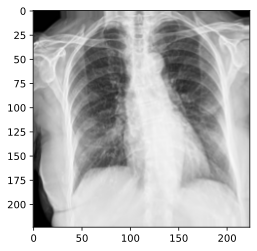

In [119]:
plt.imshow(train_densnet_data_generator[0][0][0])
plt.show()

In [120]:
train_densnet_data_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

In [123]:
step_size_train=train_densnet_data_generator.n//train_densnet_data_generator.batch_size
step_size_val=test_densnet_data_generator.n//test_densnet_data_generator.batch_size
print(step_size_train)
print(step_size_val)

7
2


In [124]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=2,restore_best_weights=True, verbose = 1) 

In [125]:
history_densenet121 = model.fit(train_densnet_data_generator,
                                          steps_per_epoch=step_size_train,
                                          epochs=10, 
                                          validation_data=test_densnet_data_generator,
                                          validation_steps=step_size_val,
                                          callbacks = [early_stopping]
                                         )

Epoch 1/10
7/7 [==============================] - 52s 5s/step - loss: 0.6949 - accuracy: 0.7078 - val_loss: 1.6462 - val_accuracy: 0.3750
Epoch 2/10
7/7 [==============================] - 29s 4s/step - loss: 0.3315 - accuracy: 0.8630 - val_loss: 1.5880 - val_accuracy: 0.5156
Epoch 3/10
7/7 [==============================] - 28s 4s/step - loss: 0.2738 - accuracy: 0.9132 - val_loss: 0.8016 - val_accuracy: 0.6719
Epoch 4/10
7/7 [==============================] - 29s 4s/step - loss: 0.1796 - accuracy: 0.9598 - val_loss: 0.7484 - val_accuracy: 0.7344
Epoch 5/10
7/7 [==============================] - 28s 4s/step - loss: 0.2183 - accuracy: 0.9041 - val_loss: 0.9576 - val_accuracy: 0.7344
Epoch 6/10
7/7 [==============================] - 28s 4s/step - loss: 0.1519 - accuracy: 0.9543 - val_loss: 0.5273 - val_accuracy: 0.7969
Epoch 7/10
7/7 [==============================] - 29s 4s/step - loss: 0.1846 - accuracy: 0.9224 - val_loss: 0.4855 - val_accuracy: 0.7656
Epoch 8/10
7/7 [==================

In [126]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):    
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

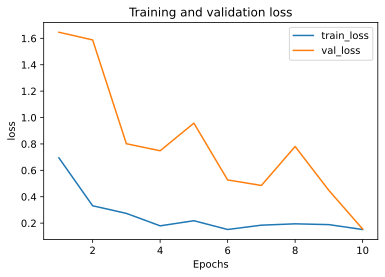

In [127]:
plot_metric(history_densenet121, 'loss')

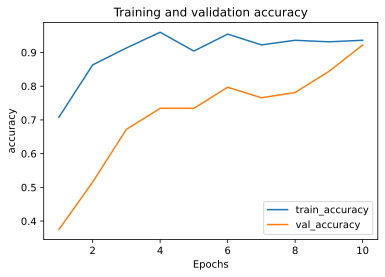

In [128]:
plot_metric(history_densenet121, 'accuracy')

In [129]:
 # returns accuracy of training
print("Training Accuracy: ", history_densenet121.history['accuracy'][-1])
print("Testing Accuracy : ", history_densenet121.history['val_accuracy'][-1])

Training Accuracy:  0.9360730648040771
Testing Accuracy :  0.921875


### Testing the model

In [131]:
Y_pred = model.predict(test_densnet_data_generator, test_densnet_data_generator.n//test_densnet_data_generator.batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
y_pred

3/3 [==============================] - 13s 2s/step


array([1, 0, 1, 0, 0, 0, 2, 1, 2, 2, 1, 2, 0, 0, 2, 1, 2, 2, 0, 2, 2, 1,
       0, 1, 1, 2, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 1, 0, 1,
       2, 1, 2, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 2, 0, 2, 2, 0],
      dtype=int64)

In [133]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(test_densnet_data_generator.classes, y_pred)
target_names = ['Healthy', 'Type1', 'Type2'] #classes names
clf_rpt = classification_report(test_densnet_data_generator.classes, y_pred, target_names=target_names)

In [134]:
conf_matrix

array([[ 7,  5,  8],
       [ 8, 12,  6],
       [ 8,  6,  6]], dtype=int64)

In [135]:
print(clf_rpt)

              precision    recall  f1-score   support

     Healthy       0.30      0.35      0.33        20
       Type1       0.52      0.46      0.49        26
       Type2       0.30      0.30      0.30        20

    accuracy                           0.38        66
   macro avg       0.38      0.37      0.37        66
weighted avg       0.39      0.38      0.38        66



Classification Report

              precision    recall  f1-score   support

     Healthy       0.30      0.35      0.33        20
       Type1       0.52      0.46      0.49        26
       Type2       0.30      0.30      0.30        20

    accuracy                           0.38        66
    macro avg      0.38      0.37      0.37        66
    weighted avg   0.39      0.38      0.38        66
    

The overall Training and Testing Accuracy of Densenet121
    
Training Accuracy:  0.9360730648040771\
Testing Accuracy :  0.921875
    
The classification accuracy using Densenet121 is much better then CNN and mobilenetv2. 

### Final Result: 
After comparing the results the Classification Accuracy of Densnet121 was much better then mobilenetv2 and CNN. 